# HSV 色彩空间可视化与算法测试

本notebook用于测试和可视化HSV色彩空间相关算法

## 1. 导入必要的库

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import colorsys

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("库导入成功！")
print(f"OpenCV 版本: {cv2.__version__}")
print(f"NumPy 版本: {np.__version__}")

库导入成功！
OpenCV 版本: 4.13.0
NumPy 版本: 2.2.5


## 2. RGB 与 HSV 转换基础 及 hsv可视化

纯红色:
RGB: (255, 0, 0)
HSV: H=0.0°, S=1.000, V=1.000
说明: H(色调)范围0-360°, S(饱和度)范围0.0-1.0, V(明度)范围0.0-1.0
      S值越高颜色越纯，V=0.0为黑色，V=1.0为白色


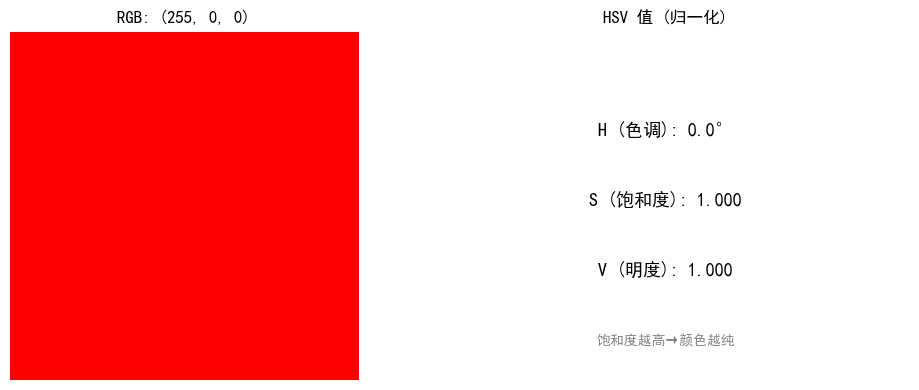

In [2]:
# 创建一个简单的RGB颜色并转换为HSV
def rgb_to_hsv_demo(r, g, b):
    """演示RGB到HSV的转换（使用归一化值）"""
    # 使用 colorsys 进行转换（归一化的 RGB 和 HSV）
    h, s, v = colorsys.rgb_to_hsv(r/255.0, g/255.0, b/255.0)
    h_deg = h * 360  # 转换为角度
    
    print(f"RGB: ({r}, {g}, {b})")
    print(f"HSV: H={h_deg:.1f}°, S={s:.3f}, V={v:.3f}")
    print(f"说明: H(色调)范围0-360°, S(饱和度)范围0.0-1.0, V(明度)范围0.0-1.0")
    print(f"      S值越高颜色越纯，V=0.0为黑色，V=1.0为白色")
    
    # 可视化
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # RGB颜色块
    rgb_display = np.ones((100, 100, 3), dtype=np.uint8)
    rgb_display[:, :] = [r, g, b]
    axes[0].imshow(rgb_display)
    axes[0].set_title(f'RGB: ({r}, {g}, {b})')
    axes[0].axis('off')
    
    # HSV信息
    axes[1].text(0.5, 0.7, f'H (色调): {h_deg:.1f}°', ha='center', fontsize=13)
    axes[1].text(0.5, 0.5, f'S (饱和度): {s:.3f}', ha='center', fontsize=13)
    axes[1].text(0.5, 0.3, f'V (明度): {v:.3f}', ha='center', fontsize=13)
    axes[1].text(0.5, 0.1, f'饱和度越高→颜色越纯', ha='center', fontsize=10, style='italic', color='gray')
    axes[1].set_title('HSV 值 (归一化)')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 测试几个颜色
print("纯红色:")
rgb_to_hsv_demo(255, 0, 0)

### 可视化 HSV 色彩空间 (圆锥体)

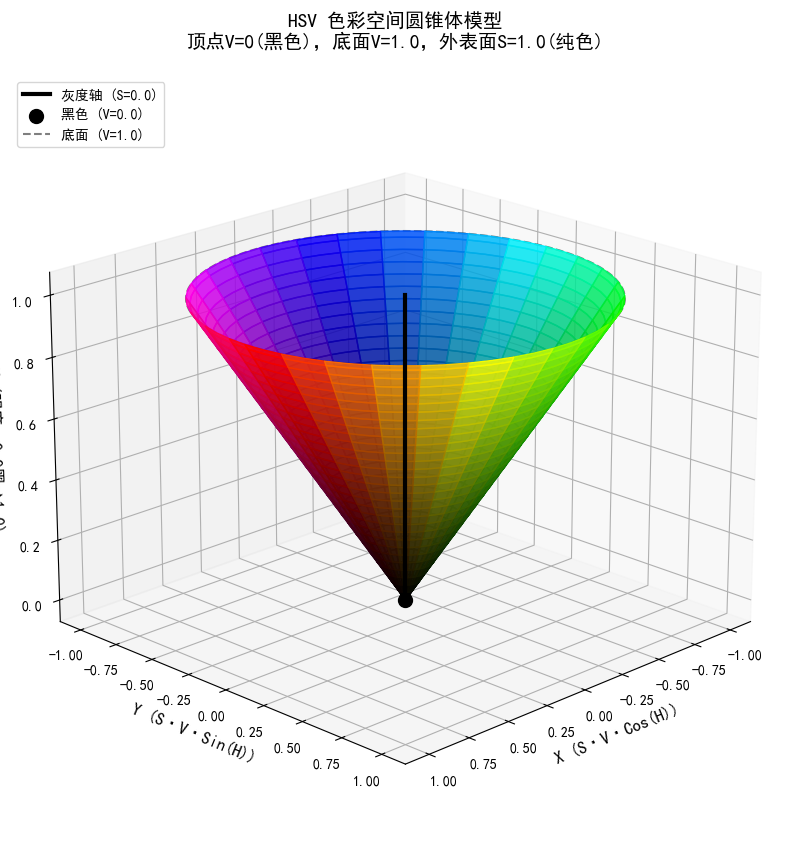

In [3]:
def visualize_hsv_cone():
    """可视化HSV色彩空间圆锥体（标准圆锥模型）"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 生成圆锥体坐标
    n_points = 60
    theta = np.linspace(0, 2*np.pi, n_points)
    v = np.linspace(0, 1, n_points)  # V: 0.0(黑，顶点) - 1.0(底面)
    Theta, V = np.meshgrid(theta, v)
    
    # 圆锥外表面 (饱和度 = 1.0, 颜色最纯)
    # 半径随明度线性增加：R = V (V=0时为点，V=1时为最大半径)
    R = V
    X_outer = R * np.cos(Theta)
    Y_outer = R * np.sin(Theta)
    
    # 为每个点计算颜色
    colors = np.zeros((n_points, n_points, 3))
    for i in range(n_points):
        for j in range(n_points):
            h = Theta[i, j] / (2 * np.pi)  # H归一化到 [0, 1]
            s = 1.0  # 外层饱和度为1.0（颜色最纯）
            v_val = V[i, j]  # V: 0.0-1.0
            if v_val > 0.01:  # 避免在顶点处出现数值问题
                r, g, b = colorsys.hsv_to_rgb(h, s, v_val)
            else:
                r, g, b = 0, 0, 0  # 顶点为黑色
            colors[i, j] = [r, g, b]
    
    # 绘制圆锥外表面
    ax.plot_surface(X_outer, Y_outer, V, facecolors=colors, shade=False, alpha=0.85)
    
    # 绘制中心轴 (饱和度 = 0.0, 灰度轴：从黑到白)
    z_axis = np.linspace(0, 1, 100)
    x_axis = np.zeros_like(z_axis)
    y_axis = np.zeros_like(z_axis)
    ax.plot(x_axis, y_axis, z_axis, 'k-', linewidth=3, label='灰度轴 (S=0.0)', zorder=10)
    
    # 标注关键点
    ax.scatter([0], [0], [0], color='black', s=100, label='黑色 (V=0.0)', zorder=11)
    
    # 绘制底部圆形（V=1.0，显示所有色调）
    theta_circle = np.linspace(0, 2*np.pi, 100)
    x_circle = np.cos(theta_circle)
    y_circle = np.sin(theta_circle)
    z_circle = np.ones_like(theta_circle)
    ax.plot(x_circle, y_circle, z_circle, 'k--', linewidth=1.5, alpha=0.5, label='底面 (V=1.0)')
    
    ax.set_xlabel('X (S·V·Cos(H))', fontsize=12)
    ax.set_ylabel('Y (S·V·Sin(H))', fontsize=12)
    ax.set_zlabel('V (明度: 0.0黑→1.0)', fontsize=12)
    ax.set_title('HSV 色彩空间圆锥体模型\n顶点V=0(黑色)，底面V=1.0，外表面S=1.0(纯色)', fontsize=14, pad=20)
    ax.legend(loc='upper left')
    
    # 设置视角
    ax.view_init(elev=20, azim=45)
    
    plt.show()

visualize_hsv_cone()

### HSV 色调 (Hue) 色轮可视化

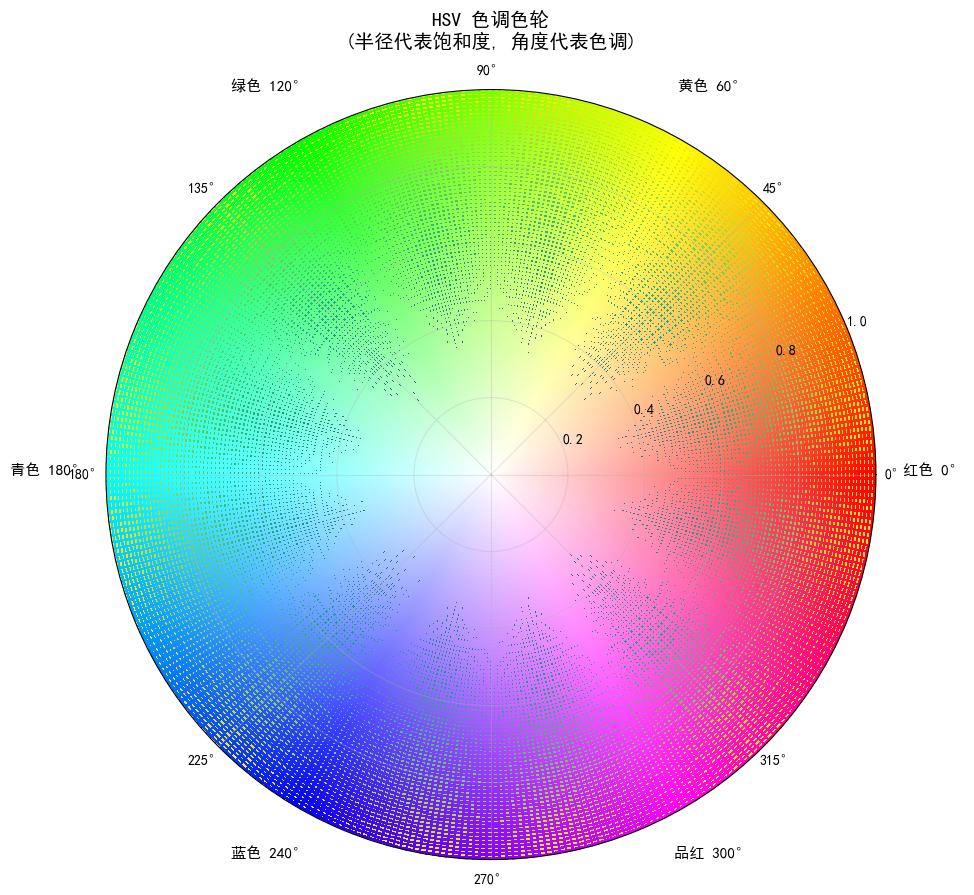

In [4]:
def plot_hue_wheel():
    """绘制HSV色调色轮"""
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # 生成色轮数据
    n = 360
    theta = np.linspace(0, 2*np.pi, n)
    radii = np.linspace(0, 1, 100)
    
    Theta, Radii = np.meshgrid(theta, radii)
    
    # 创建颜色映射
    colors = np.zeros((len(radii), len(theta), 3))
    for i, r in enumerate(radii):
        for j, t in enumerate(theta):
            h = t / (2 * np.pi)
            s = r  # 饱和度随半径增加
            v = 1.0  # 固定明度
            colors[i, j] = colorsys.hsv_to_rgb(h, s, v)
    
    # 绘制色轮
    ax.pcolormesh(Theta, Radii, Radii, color=colors.reshape(-1, 3), shading='auto')
    
    # 标注主要颜色
    color_labels = [
        (0, '红色 0°'),
        (60, '黄色 60°'),
        (120, '绿色 120°'),
        (180, '青色 180°'),
        (240, '蓝色 240°'),
        (300, '品红 300°')
    ]
    
    for angle, label in color_labels:
        rad = np.radians(angle)
        ax.text(rad, 1.15, label, ha='center', fontsize=11, fontweight='bold')
    
    ax.set_ylim(0, 1)
    ax.set_title('HSV 色调色轮\n(半径代表饱和度, 角度代表色调)', 
                 fontsize=14, pad=30)
    ax.grid(True, alpha=0.3)
    
    plt.show()

plot_hue_wheel()

## 3. 图像颜色分割示例

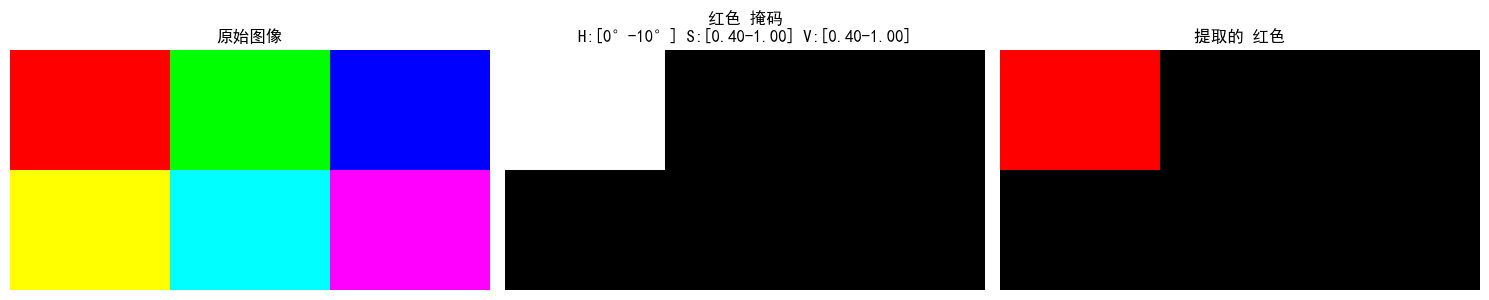

In [5]:
def create_test_image():
    """创建一个测试图像，包含多种颜色"""
    img = np.zeros((300, 600, 3), dtype=np.uint8)
    
    # 红色区域
    img[0:150, 0:200] = [0, 0, 255]
    # 绿色区域
    img[0:150, 200:400] = [0, 255, 0]
    # 蓝色区域
    img[0:150, 400:600] = [255, 0, 0]
    # 黄色区域
    img[150:300, 0:200] = [0, 255, 255]
    # 青色区域
    img[150:300, 200:400] = [255, 255, 0]
    # 品红区域
    img[150:300, 400:600] = [255, 0, 255]
    
    return img

def segment_color_by_hsv_normalized(img, lower_h, upper_h, lower_s=0.4, upper_s=1.0, lower_v=0.4, upper_v=1.0, color_name=''):
    """
    根据归一化的HSV范围分割颜色
    参数:
        img: 输入图像(BGR格式)
        lower_h, upper_h: 色调范围 (0-360度)
        lower_s, upper_s: 饱和度范围 (0.0-1.0)
        lower_v, upper_v: 明度范围 (0.0-1.0)
        color_name: 颜色名称
    """
    # 转换为HSV（OpenCV格式：H=0-179, S=0-255, V=0-255）
    hsv_cv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 将归一化值转换为OpenCV格式
    lower_hsv_cv = np.array([lower_h/2, lower_s*255, lower_v*255])
    upper_hsv_cv = np.array([upper_h/2, upper_s*255, upper_v*255])
    
    mask = cv2.inRange(hsv_cv, lower_hsv_cv, upper_hsv_cv)
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # 显示结果
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('原始图像')
    axes[0].axis('off')
    
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title(f'{color_name} 掩码\nH:[{lower_h:.0f}°-{upper_h:.0f}°] S:[{lower_s:.2f}-{upper_s:.2f}] V:[{lower_v:.2f}-{upper_v:.2f}]')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[2].set_title(f'提取的 {color_name}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# 创建测试图像
test_img = create_test_image()

# 提取红色 (H: 0-10度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=0, upper_h=10, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='红色')

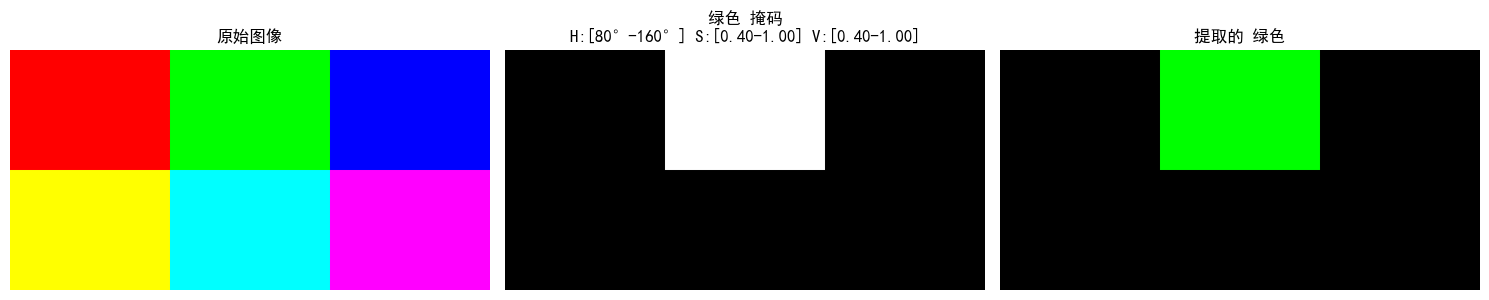

In [6]:
# 提取绿色 (H: 80-160度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=80, upper_h=160, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='绿色')

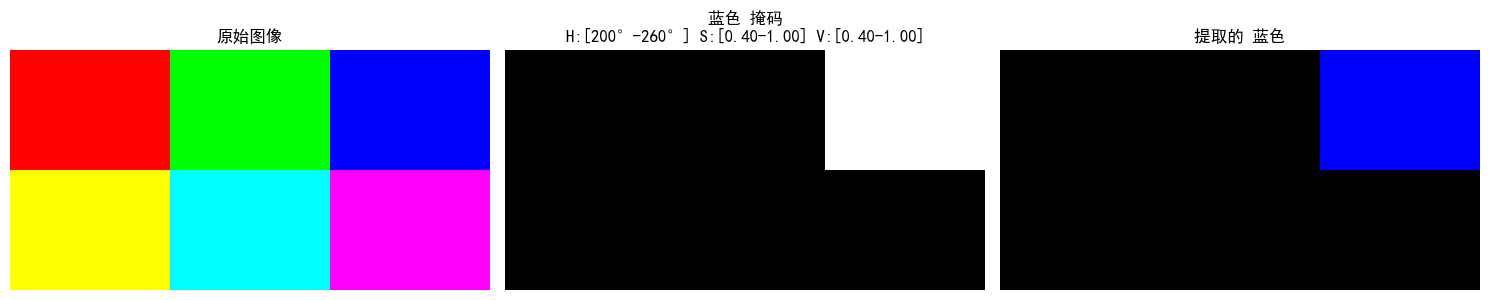

In [7]:
# 提取蓝色 (H: 200-260度, S: 0.4-1.0, V: 0.4-1.0)
segment_color_by_hsv_normalized(test_img, lower_h=200, upper_h=260, 
                                lower_s=0.4, upper_s=1.0, 
                                lower_v=0.4, upper_v=1.0, 
                                color_name='蓝色')

## 4. 自定义测试区域 - 上传图片并提取色块

### 步骤1: 从本地文件加载图片

In [39]:
# 方法1: 从文件路径加载图片
def load_image_from_path(image_path):
    """
    从文件路径加载图片
    参数:
        image_path: 图片的完整路径（支持 jpg, png, bmp 等格式）
    返回:
        img: BGR格式的图片数组
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"错误：无法加载图片 {image_path}")
        print("请检查:")
        print("1. 文件路径是否正确")
        print("2. 文件是否存在")
        print("3. 文件格式是否支持（jpg, png, bmp等）")
        return None
    
    print(f"图片加载成功！")
    print(f"图片尺寸: {img.shape[1]} x {img.shape[0]} pixels")
    print(f"颜色通道: {img.shape[2]}")
    
    # 显示原图
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('加载的图片')
    plt.axis('off')
    plt.show()
    
    return img
# 使用示例：
# my_img = load_image_from_path(r"D:\path\to\your\image.jpg")


# 方法2: 使用文件选择器上传图片
from tkinter import Tk, filedialog
import os

def select_and_load_image():
    """
    打开文件选择对话框，让用户选择图片文件
    返回:
        img: BGR格式的图片数组
    """
    # 创建一个隐藏的 Tk 窗口
    root = Tk()
    root.withdraw()  # 隐藏主窗口
    root.attributes('-topmost', True)  # 将对话框置于最前面
    
    # 打开文件选择对话框
    print("请在弹出的窗口中选择图片文件...")
    file_path = filedialog.askopenfilename(
        title="选择图片文件",
        filetypes=[
            ("图片文件", "*.jpg *.jpeg *.png *.bmp *.tiff *.webp"),
            ("所有文件", "*.*")
        ]
    )
    
    root.destroy()  # 关闭 Tk 窗口
    
    if not file_path:
        print("未选择文件")
        return None
    
    print(f"选择的文件: {file_path}")
    return load_image_from_path(file_path)

请在弹出的窗口中选择图片文件...
选择的文件: C:/Users/86178/Desktop/oilpaintingLib/365.jpg
图片加载成功！
图片尺寸: 1206 x 838 pixels
颜色通道: 3
选择的文件: C:/Users/86178/Desktop/oilpaintingLib/365.jpg
图片加载成功！
图片尺寸: 1206 x 838 pixels
颜色通道: 3


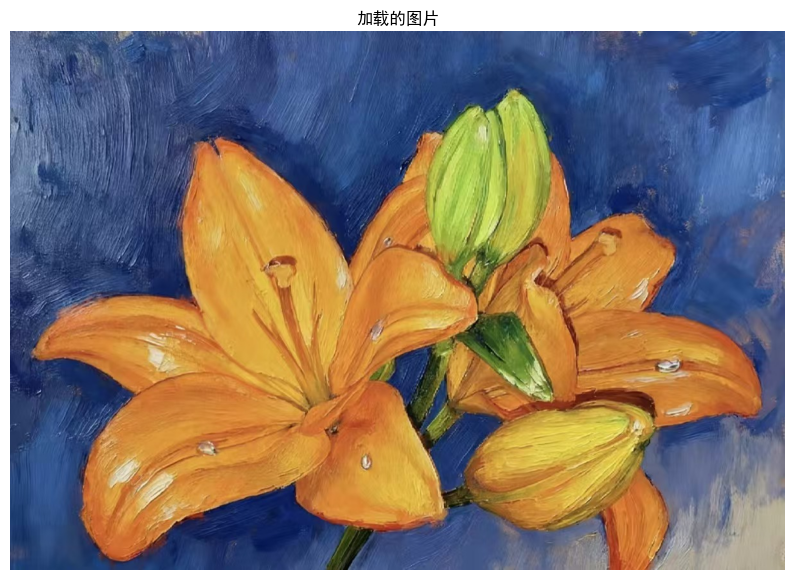

In [44]:
# 选择一种方法加载图片：

# 方法1: 直接指定文件路径（推荐用于重复测试）
# my_img = load_image_from_path(r"D:\your\image\path\here.jpg")

# 方法2: 使用文件选择器
my_img = select_and_load_image()

### 步骤2: 提取指定颜色的色块

调整 HSV 参数来提取你想要的颜色：
- **H (色调)**: 0-360° - 选择颜色类型
  - 红色: 0-10° 或 350-360°
  - 黄色: 40-70°
  - 绿色: 80-160°
  - 青色: 170-200°
  - 蓝色: 200-260°
  - 品红/紫色: 280-330°
  
- **S (饱和度)**: 0.0-1.0 - 值越高颜色越纯
  - 高饱和度 (0.6-1.0): 鲜艳的颜色
  - 低饱和度 (0.0-0.3): 接近灰色
  
- **V (明度)**: 0.0-1.0 - 0.0为黑色，1.0为最亮
  - 亮色 (0.6-1.0)
  - 暗色 (0.0-0.4)

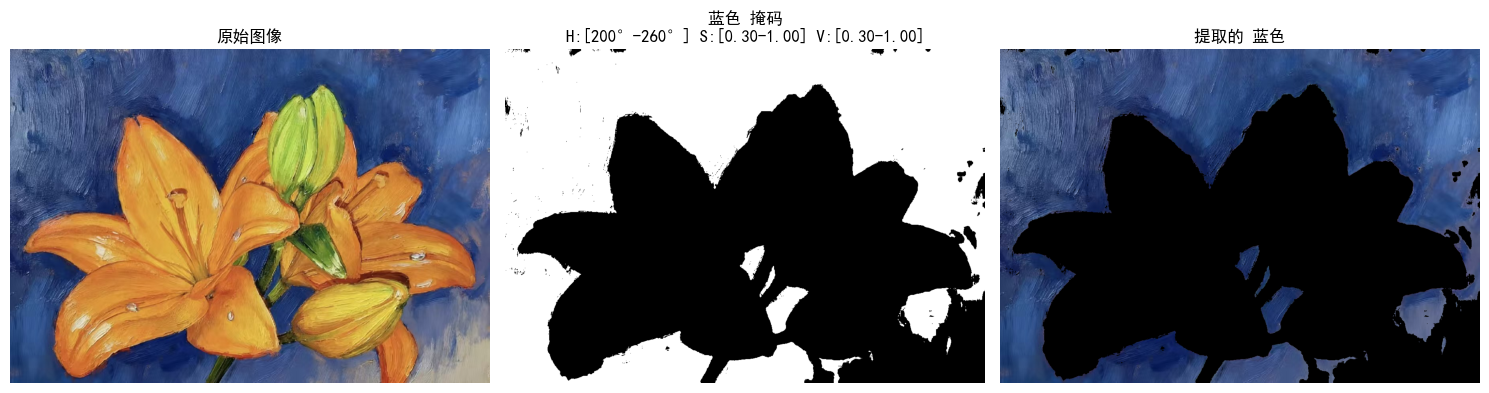

In [45]:
# 确保图片已加载
if 'my_img' in locals() and my_img is not None:
    # 提取指定颜色 - 根据需要修改参数
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=200,      # 色调下限 (0-360度)
        upper_h=260,     # 色调上限 (0-360度)
        lower_s=0.3,    # 饱和度下限 (0.0-1.0)
        upper_s=1.0,    # 饱和度上限 (0.0-1.0)
        lower_v=0.3,    # 明度下限 (0.0-1.0)
        upper_v=1.0,    # 明度上限 (0.0-1.0)
        color_name='蓝色'  # 颜色名称（用于显示）
    )
else:
    print("请先在上面的单元格中加载图片！")

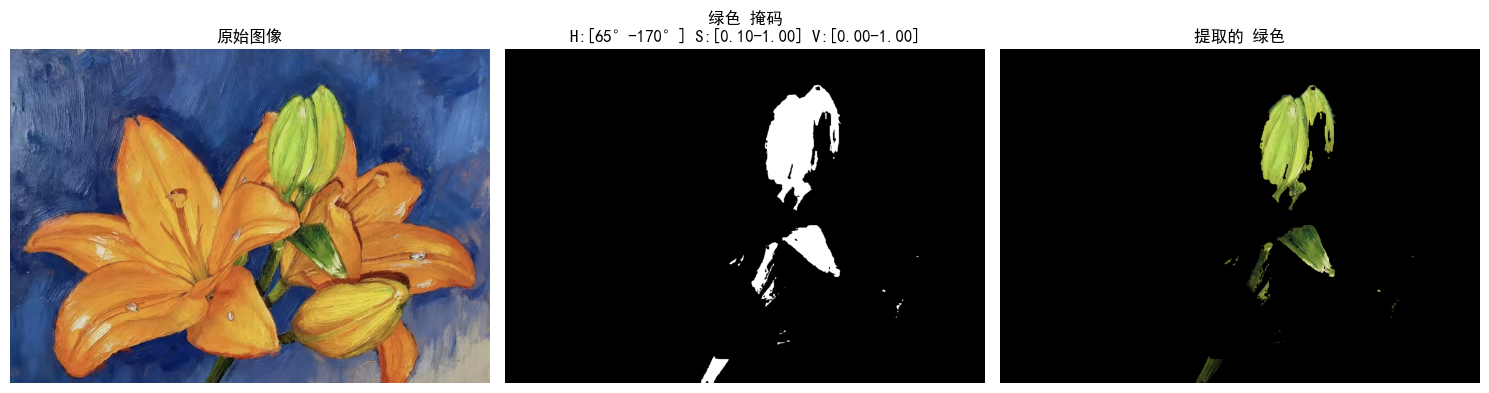

In [46]:
# 提取第二种颜色
if 'my_img' in locals() and my_img is not None:
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=65,     # 绿色范围
        upper_h=170, 
        lower_s=0.1, 
        upper_s=1.0, 
        lower_v=0.0, 
        upper_v=1.0, 
        color_name='绿色'
    )
else:
    print("请先加载图片！")

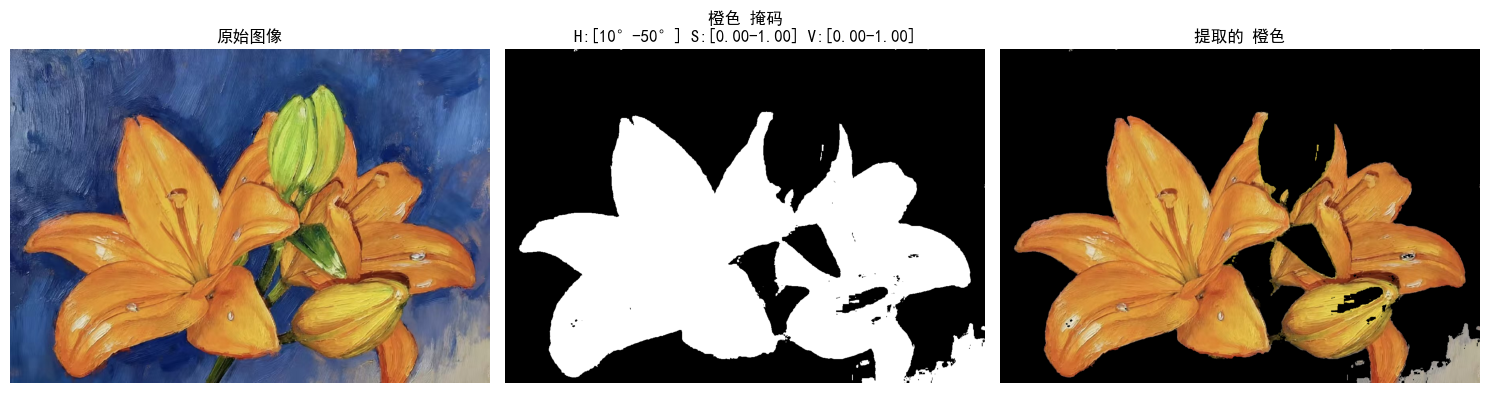

In [47]:
# 提取第三种颜色
if 'my_img' in locals() and my_img is not None:
    segment_color_by_hsv_normalized(
        my_img, 
        lower_h=10,     # 橙色范围
        upper_h=50, 
        lower_s=0.0, 
        upper_s=1.0, 
        lower_v=0.0, 
        upper_v=1.0, 
        color_name='橙色'
    )
else:
    print("请先加载图片！")